In [1]:
import tensorflow as tf
import tensorflow.keras as tfk
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("/content/ts_hr_feb_2020.csv", parse_dates=['date'])

In [8]:
data.head()

,date,sales_value
0,2020-02-01 00:00:00,28.60
1,2020-02-01 01:00:00,122.84
2,2020-02-01 02:00:00,112.87
3,2020-02-01 03:00:00,357.20
4,2020-02-01 04:00:00,642.56


In [9]:
numerical_i = tf.keras.layers.Input((24, 1))
numerical = tf.keras.layers.Conv1D(10, 3)(numerical_i)
numerical = tf.keras.layers.Flatten()(numerical)
dense = tf.keras.layers.Dense(200, 'relu')(numerical)
out = tf.keras.layers.Dense(24, 'relu')(dense)

mdl = tf.keras.Model(numerical_i, out)
mdl.compile('adam', 'mae')
mdl.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 22, 10)            40        
_________________________________________________________________
flatten (Flatten)            (None, 220)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               44200     
_________________________________________________________________
dense_1 (Dense)              (None, 24)                4824      
Total params: 49,064
Trainable params: 49,064
Non-trainable params: 0
_________________________________________________________________


In [10]:
last_sunday = pd.to_datetime("2020-02-23")
train = data[data['date'] < last_sunday]
val = data[data['date'] >= last_sunday]

In [11]:
l = 24
h = 24

X = []
Y = []
for i in range(l,train.shape[0]-h):
    f = train.iloc[i-l:i]['sales_value'].values #hoje
    y = train.iloc[i:i+h]['sales_value'].values # 1 dia depois
    
    X.append(f)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

X = np.expand_dims(X, -1)

In [46]:
mdl.fit(X, Y, batch_size=1, shuffle=True, epochs=5)

Epoch 1/5
479/479 [==============================] - 0s 1ms/step - loss: 213.5412
Epoch 2/5
479/479 [==============================] - 0s 991us/step - loss: 215.5959
Epoch 3/5
479/479 [==============================] - 0s 1ms/step - loss: 216.4483
Epoch 4/5
479/479 [==============================] - 0s 974us/step - loss: 215.6711
Epoch 5/5
479/479 [==============================] - 0s 980us/step - loss: 214.4876


In [43]:
Xv = []
Yv = []
for i in range(l,val.shape[0]-h):
    f = val.iloc[i-l:i]['sales_value'].values #hoje
    y = val.iloc[i:i+h]['sales_value'].values # 1 dia depois
    
    Xv.append(f)
    Yv.append(y)

Xv = np.array(Xv)
Yv = np.array(Yv)

Xv = np.expand_dims(Xv, -1)
#Y = np.expand_dims(Y, -1)

In [47]:
p = mdl.predict(Xv)

In [30]:
Yv.shape

(121, 24)

In [31]:
p.shape

(121, 24)

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Yv, p)

504.482031728348

In [49]:
p_base = np.ones(Yv.shape)*np.median(Y, axis=0)

In [51]:
mean_absolute_error(Yv, p_base)

829.0155612947652

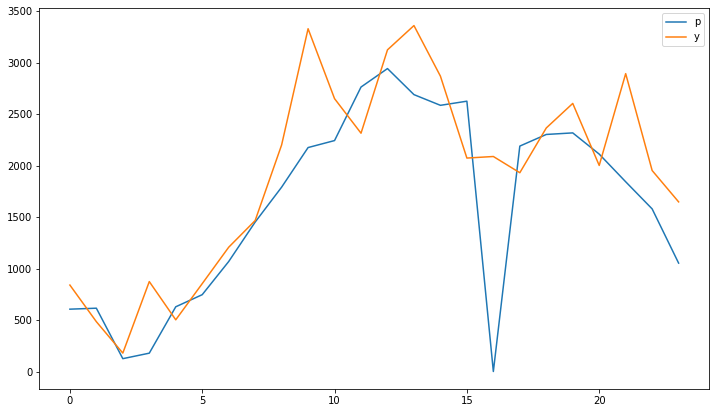

In [36]:
pd.DataFrame({'p': p[71,:], 'y': Yv[71,:]}).plot(figsize=(12,7))